In [1]:
import numpy as np 
import pandas as pd
import os
import joblib
import sklearn 
import matplotlib
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

#Regressions:

from sklearn.multioutput import MultiOutputRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

#Metric
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


from pandas import DataFrame


# Show progress bar
from tqdm import tqdm

In [2]:
df = pd.read_csv('flo_dataset_augmented.csv')
df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,in_amount_mmol,p_amount_mmol,ligand_amount_mmol,first_sol_amount_ml,second_sol_amount_ml,third_sol_amount_ml,...,x6_zinc stearate,x6_zinc undecylenate,x7_None,x7_copper bromide,x7_oleic acid,x7_water,x7_zinc iodide,diameter_nm,abs_nm,emission_nm
0,0,0,0,0,0.154575,-0.011188,-0.247025,-0.673379,-0.370637,-0.096002,...,1,0,1,0,0,0,0,1.750000,480.0,539.0
1,1,1,1,1,0.195883,0.280681,-0.439228,-0.658075,-0.370637,-0.096002,...,0,0,1,0,0,0,0,2.610000,610.0,688.5
2,2,2,2,2,-0.423738,-0.412509,-0.439228,-0.655198,-0.370637,-0.096002,...,0,0,1,0,0,0,0,3.088889,560.0,595.0
3,3,3,3,3,-0.423738,-0.412509,-0.439228,-0.655198,-0.370637,-0.096002,...,0,0,1,0,0,0,0,3.233333,590.0,635.0
4,4,4,4,4,0.154575,-0.011188,-0.247025,-0.604513,-0.370637,-0.096002,...,0,0,1,0,0,0,0,2.383333,482.2,500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,210,214,214,214,0.154575,-0.376755,0.713993,4.491519,-0.370637,-0.096002,...,0,0,1,0,0,0,0,4.000000,585.0,630.0
211,211,215,215,215,7.590031,7.504453,-0.439228,5.524499,-0.370637,-0.096002,...,0,0,1,0,0,0,0,2.833333,465.0,550.0
212,212,216,216,216,2.633061,0.718486,4.173657,6.213152,4.521657,-0.096002,...,0,0,1,0,0,0,0,1.933333,465.0,595.0
213,213,217,217,217,2.633061,0.718486,4.173657,6.213152,4.521657,-0.096002,...,0,0,1,0,0,0,0,3.033333,495.0,595.0


In [3]:
# Input for ML models

input_col = ['in_amount_mmol', 'p_amount_mmol', 'ligand_amount_mmol',
       'first_sol_amount_ml', 'second_sol_amount_ml', 'third_sol_amount_ml',
       'other_1_amount_mmol', 'other_2_amount_mmol', 'total_volume_ml',
       'temp_c', 'time_min', 'x0_chloroindium oxalate', 'x0_indium acetate',
       'x0_indium bromide', 'x0_indium chloride', 'x0_indium iodide',
       'x0_indium myristate', 'x0_indium oxalate', 'x0_indium palmitate',
       'x0_indium trifluoroacetate',
       'x0_indium tris(N,N-diisopropylacetamidinato)',
       'x1_bis(trimethylsilyl)phosphine', 'x1_phosphine gas',
       'x1_phosphorus trichloride', 'x1_sodium phosphide',
       'x1_tris(diethylamino)phosphine', 'x1_tris(dimethylamino)phosphine',
       'x1_tris(trimethylgermyl)phosphine', 'x1_tris(trimethylsilyl)phosphine',
       'x1_white phosphorus', 'x2_None', 'x2_dodecanethiol', 'x2_lauric acid',
       'x2_myristic acid', 'x2_oleic acid', 'x2_palmitic acid',
       'x2_stearic acid', 'x3_4-ethylpyridine', 'x3_None',
       'x3_dimethylformamide', 'x3_dodecylamine', 'x3_mesitylene',
       'x3_octadecene', 'x3_oleylamine', 'x3_trioctylamine',
       'x3_trioctylphosphine', 'x3_trioctylphosphine oxide', 'x4_None',
       'x4_dioctyl ether', 'x4_dioctylamine', 'x4_hexadecylamine',
       'x4_octylamine', 'x4_oleylamine', 'x4_toluene', 'x4_trioctylphosphine',
       'x4_trioctylphosphine oxide', 'x5_None', 'x5_trioctylphosphine',
       'x6_None', 'x6_acetic acid', 'x6_superhydride',
       'x6_tetrabutylammonium myristate', 'x6_zinc acetate', 'x6_zinc bromide',
       'x6_zinc chloride', 'x6_zinc iodide', 'x6_zinc octanoate',
       'x6_zinc oleate', 'x6_zinc stearate', 'x6_zinc undecylenate', 'x7_None',
       'x7_copper bromide', 'x7_oleic acid', 'x7_water', 'x7_zinc iodide']

#Three individual outputs:
diameter = ['diameter_nm']
emission = ['emission_nm']
absorbance = ['abs_nm']

#Splitting dataset

X = df[input_col]

Y_d = df[diameter]
Y_e = df[emission]
Y_a = df[absorbance]


X_train_d, X_test_d, Y_train_d, Y_test_d = train_test_split(X, Y_d, test_size=0.15, random_state=45, shuffle=True)
X_train_e, X_test_e, Y_train_e, Y_test_e = train_test_split(X, Y_e, test_size=0.15, random_state=45, shuffle=True)
X_train_a, X_test_a, Y_train_a, Y_test_a = train_test_split(X, Y_a, test_size=0.15, random_state=45, shuffle=True)

## D - Optimizing diameter model


### 1D. Extra Trees

In [5]:
# This is a grid search for three parameters in the Extra Trees algorithm. 
# Parameters are: random_state, n_estimators, max_features.

# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 25)):
    for j in range(1, 25):
        for k in range(2, 50, 1):
            ET_regr = ExtraTreesRegressor(n_estimators=i, 
                                            max_features=j,
                                            random_state=k)
            
            ET_regr.fit(X_train_d, np.ravel(Y_train_d))
            ET_Y_pred_d = pd.DataFrame(ET_regr.predict(X_test_d))

            mae = mean_absolute_error(Y_test_d, ET_Y_pred_d)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 24/24 [11:07<00:00, 27.83s/it]

0.22964646465151514 2 23 36


### 2D. Decision Tree 

In [6]:
# This is a grid search for three parameters in the Decision Trees algorithm. 
# Parameters are: max_depth, max_features, random_state.
# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999

min_i, min_j, min_k  = 0, 0, 0

for i in tqdm(range(1, 30)):
    for j in range(1, 30):
        for k in range(4, 80, 2):
            
            DT_regr = DecisionTreeRegressor(max_depth=i,
                                max_features=j,
                                random_state=k)
            
            DT_regr.fit(X_train_d, np.ravel(Y_train_d))
            DT_Y_pred_d = pd.DataFrame(DT_regr.predict(X_test_d))

            mae = mean_absolute_error(Y_test_d, DT_Y_pred_d)
            
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 29/29 [04:28<00:00,  9.25s/it]

0.20102540010300343 12 29 56


### 3D. Random Forest

In [7]:
# This is a grid search for three parameters in the Random Forest algorithm. 
# Parameters are: max_depth, n_estimators, max_features.
# Random_state is set to 45.
# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 31)):
    for j in range(1, 31):
        for k in range(2, 50, 1):
            RF_regr = RandomForestRegressor(max_depth=i, 
                                            n_estimators=j, 
                                            max_features=k,
                                            random_state=45)
            RF_regr.fit(X_train_d, np.ravel(Y_train_d))
            RF_Y_pred_d = pd.DataFrame(RF_regr.predict(X_test_d))

            mae = mean_absolute_error(Y_test_d, RF_Y_pred_d)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 30/30 [20:38<00:00, 41.27s/it]

0.21559858009815128 11 5 41


### 4D. K Neighbors

In [8]:
min_mae = 99999
min_i, min_j = 0, 0

for i in tqdm(range(1, 40)):
    for j in range(1, 40):

        KNN_reg_d = KNeighborsRegressor(n_neighbors=i, 
                                      p=j).fit(X_train_d, np.ravel(Y_train_d))

        KNN_Y_pred_d = KNN_reg_d.predict(X_test_d)

        mae = mean_absolute_error(Y_test_d, KNN_Y_pred_d)

        if (min_mae > mae):
            min_mae = mae
            min_i = i
            min_j = j

print(min_mae, min_i, min_j)

100%|██████████| 39/39 [00:23<00:00,  1.65it/s]

0.2835802468686869 3 3


### Saving Decision Tree model

In [11]:
DT_regr_d = DecisionTreeRegressor(max_depth=12,
                                max_features=29,
                                random_state=56)
DT_regr_d.fit(X_train_d, np.ravel(Y_train_d))
DT_Y_pred_d = pd.DataFrame(DT_regr_d.predict(X_test_d))
joblib.dump(DT_regr_d, "./model_SO_diameter_DecisionTree.joblib")

['./model_SO_diameter_DecisionTree.joblib']

## E - Optimizing emission model


### 1E. Extra Trees

In [12]:
# This is a grid search for three parameters in the Extra Trees algorithm. 
# Parameters are: random_state, n_estimators, max_features.

# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 25)):
    for j in range(1, 25):
        for k in range(2, 50, 1):
            ET_regr_e = ExtraTreesRegressor(n_estimators=i, 
                                            max_features=j,
                                            random_state=k)
            
            ET_regr_e.fit(X_train_e, np.ravel(Y_train_e))
            ET_Y_pred_e = pd.DataFrame(ET_regr_e.predict(X_test_e))

            mae = mean_absolute_error(Y_test_e, ET_Y_pred_e)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 24/24 [08:44<00:00, 21.84s/it]

12.378787878787879 2 6 26


### 2E. Decision Trees

In [13]:
# This is a grid search for three parameters in the Decision Trees algorithm. 

# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999

min_i, min_j, min_k  = 0, 0, 0

for i in tqdm(range(1, 30)):
    for j in range(1, 30):
        for k in range(4, 80, 2):
            
            DT_regr_e = DecisionTreeRegressor(max_depth=i,
                                max_features=j,
                                random_state=k)
            
            DT_regr_e.fit(X_train_e, np.ravel(Y_train_e))
            DT_Y_pred_e = pd.DataFrame(DT_regr_e.predict(X_test_e))

            mae = mean_absolute_error(Y_test_e, DT_Y_pred_e)
            
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 29/29 [03:14<00:00,  6.72s/it]

16.98515592912046 8 3 12


### 3E. Random Forest

In [14]:
min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 31)):
    for j in range(1, 31):
        for k in range(2, 50, 1):
            RF_regr_e = RandomForestRegressor(max_depth=i, 
                                            n_estimators=j, 
                                            max_features=k,
                                            random_state=45)
            RF_regr_e.fit(X_train_e, np.ravel(Y_train_e))
            RF_Y_pred_e = pd.DataFrame(RF_regr_e.predict(X_test_e))

            mae = mean_absolute_error(Y_test_e, RF_Y_pred_e)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 30/30 [19:35<00:00, 39.17s/it]

16.248989898989905 22 5 28


### 4E. K Neighbors

In [30]:
min_mae = 99999
min_i, min_j = 0, 0

for i in tqdm(range(1, 40)):
    for j in range(1, 40):

        KNN_reg_e = KNeighborsRegressor(n_neighbors=i, 
                                      p=j).fit(X_train_e, np.ravel(Y_train_e))

        KNN_Y_pred_e = KNN_reg_e.predict(X_test_e)

        mae = mean_absolute_error(Y_test_e, KNN_Y_pred_e)

        if (min_mae > mae):
            min_mae = mae
            min_i = i
            min_j = j

print(min_mae, min_i, min_j)

100%|██████████| 39/39 [00:18<00:00,  2.07it/s]

15.676767672727278 1 4


### Saving Extra Trees model

In [15]:
ET_regr_e = ExtraTreesRegressor(n_estimators=2,
                            max_features=6,     
                            random_state=26).fit(X_train_e, np.ravel(Y_train_e))
                  
ET_Y_pred_e = ET_regr_e.predict(X_test_e)

joblib.dump(ET_regr_e, "./model_SO_emission_ExtraTrees.joblib")

['./model_SO_emission_ExtraTrees.joblib']

## A - Optimizing absorption model


### 1A: Extra Trees

In [16]:
# This is a grid search for three parameters in the Extra Trees algorithm. 
# Parameters are: random_state, n_estimators, max_features.

# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 30)):
    for j in range(1, 30):
        for k in range(2, 50, 1):
            ET_regr_a = ExtraTreesRegressor(n_estimators=i, 
                                            max_features=j,
                                            random_state=k)
            
            ET_regr_a.fit(X_train_a, np.ravel(Y_train_a))
            ET_Y_pred_a = pd.DataFrame(ET_regr_a.predict(X_test_a))

            mae = mean_absolute_error(Y_test_a, ET_Y_pred_a)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 29/29 [14:41<00:00, 30.41s/it]

12.601893939393939 8 25 3


### 2A. Decision Trees


In [17]:
# This is a grid search for three parameters in the Decision Trees algorithm. 

# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999

min_i, min_j, min_k  = 0, 0, 0

for i in tqdm(range(1, 30)):
    for j in range(1, 30):
        for k in range(4, 80, 2):
            
            DT_regr_a = DecisionTreeRegressor(max_depth=i,
                                max_features=j,
                                random_state=k)
            
            DT_regr_a.fit(X_train_a, np.ravel(Y_train_a))
            DT_Y_pred_a = pd.DataFrame(DT_regr_a.predict(X_test_a))

            mae = mean_absolute_error(Y_test_a, DT_Y_pred_a)
            
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 29/29 [03:23<00:00,  7.02s/it]

17.96125541125541 12 6 26


In [22]:
DT_regr_a = DecisionTreeRegressor(max_depth=20,
                                max_features=20,
                                random_state=12).fit(X_train_a, np.ravel(Y_train_a))
                  
DT_Y_pred_a = DT_regr_a.predict(X_test_a)


DT_r2_a = r2_score(Y_test_a, DT_Y_pred_a)
DT_MSE_a = mean_squared_error(Y_test_a, DT_Y_pred_a)
DT_RMSE_a = mean_squared_error(Y_test_a, DT_Y_pred_a, squared=False)
DT_MAE_a = mean_absolute_error(Y_test_a, DT_Y_pred_a)
print('diameter:', 'r2:', DT_r2_a, '; MSE:', DT_MSE_a, '; RMSE:', DT_RMSE_a, '; MAE:', DT_MAE_a)

diameter: r2: 0.7157594152974505 ; MSE: 1033.208754199327 ; RMSE: 32.14356474007398 ; MAE: 20.595959593939398


### 3A. Random Forest

In [18]:
min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 31)):
    for j in range(1, 31):
        for k in range(2, 50, 1):
            RF_regr_a = RandomForestRegressor(max_depth=i, 
                                            n_estimators=j, 
                                            max_features=k,
                                            random_state=45)
            RF_regr_a.fit(X_train_a, np.ravel(Y_train_a))
            RF_Y_pred_a = pd.DataFrame(RF_regr_a.predict(X_test_a))

            mae = mean_absolute_error(Y_test_a, RF_Y_pred_a)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 30/30 [19:43<00:00, 39.44s/it]

15.484848484848484 20 2 38


### 4A. K Neighbors

In [19]:
min_mae = 99999
min_i, min_j = 0, 0

for i in tqdm(range(1, 40)):
    for j in range(1, 40):

        KNN_reg_a = KNeighborsRegressor(n_neighbors=i, 
                                      p=j).fit(X_train_a, np.ravel(Y_train_a))

        KNN_Y_pred_a = KNN_reg_a.predict(X_test_a)

        mae = mean_absolute_error(Y_test_a, KNN_Y_pred_a)

        if (min_mae > mae):
            min_mae = mae
            min_i = i
            min_j = j

print(min_mae, min_i, min_j)

100%|██████████| 39/39 [00:21<00:00,  1.83it/s]

18.484848484848484 2 7


### Saving model

In [21]:
ET_regr_a = ExtraTreesRegressor(n_estimators=8, 
                                max_features=25,
                                random_state=3)
            
ET_regr_a.fit(X_train_a, np.ravel(Y_train_a))
ET_Y_pred_a = pd.DataFrame(ET_regr_a.predict(X_test_a))

joblib.dump(ET_regr_a, "./model_SO_abs_ExtraTrees.joblib")

['./model_SO_abs_ExtraTrees.joblib']

## Analyzing

In [5]:
## Diameter

DT_regr_d = DecisionTreeRegressor(max_depth=12,
                                max_features=29,
                                random_state=56)
DT_regr_d.fit(X_train_d, np.ravel(Y_train_d))
DT_Y_pred_d = DT_regr_d.predict(X_test_d)

D_mae = mean_absolute_error(Y_test_d, DT_Y_pred_d)
D_r_2 = r2_score(Y_test_d, DT_Y_pred_d)
D_mse = mean_squared_error(Y_test_d, DT_Y_pred_d)
D_rmse = mean_squared_error(Y_test_d, DT_Y_pred_d, squared=False)

## Emission

ET_regr_e = ExtraTreesRegressor(n_estimators=2,
                            max_features=6,     
                            random_state=26).fit(X_train_e, np.ravel(Y_train_e))

                  
ET_Y_pred_e = ET_regr_e.predict(X_test_e)

E_mae = mean_absolute_error(Y_test_e, ET_Y_pred_e)
E_r_2 = r2_score(Y_test_e, ET_Y_pred_e)
E_mse = mean_squared_error(Y_test_e, ET_Y_pred_e)
E_rmse = mean_squared_error(Y_test_e, ET_Y_pred_e, squared=False)


### Absorption

ET_regr_a = ExtraTreesRegressor(n_estimators=8, 
                                max_features=25,
                                random_state=3)
ET_regr_a.fit(X_train_a, np.ravel(Y_train_a))
ET_Y_pred_a = ET_regr_a.predict(X_test_a)

A_mae = mean_absolute_error(Y_test_a, ET_Y_pred_a)
A_r_2 = r2_score(Y_test_a, ET_Y_pred_a)
A_mse = mean_squared_error(Y_test_a, ET_Y_pred_a)
A_rmse = mean_squared_error(Y_test_a, ET_Y_pred_a, squared=False)


from tabulate import tabulate

d = [ ["Diameter", D_r_2, D_mae, D_mse, D_rmse],
     ["Absorption", A_r_2, A_mae, A_mse, A_rmse],
     ["Emission", E_r_2, E_mae, E_mse, E_rmse]]

print(tabulate(d, headers=["Outputs", "R2", "Mean absolute error", "Mean squared error", "Root mean squared error"]))

Outputs           R2    Mean absolute error    Mean squared error    Root mean squared error
----------  --------  ---------------------  --------------------  -------------------------
Diameter    0.623929               0.201025             0.0884887                    0.29747
Absorption  0.822726              12.6019             380.792                       19.5139
Emission    0.676717              12.3788             480.277                       21.9152


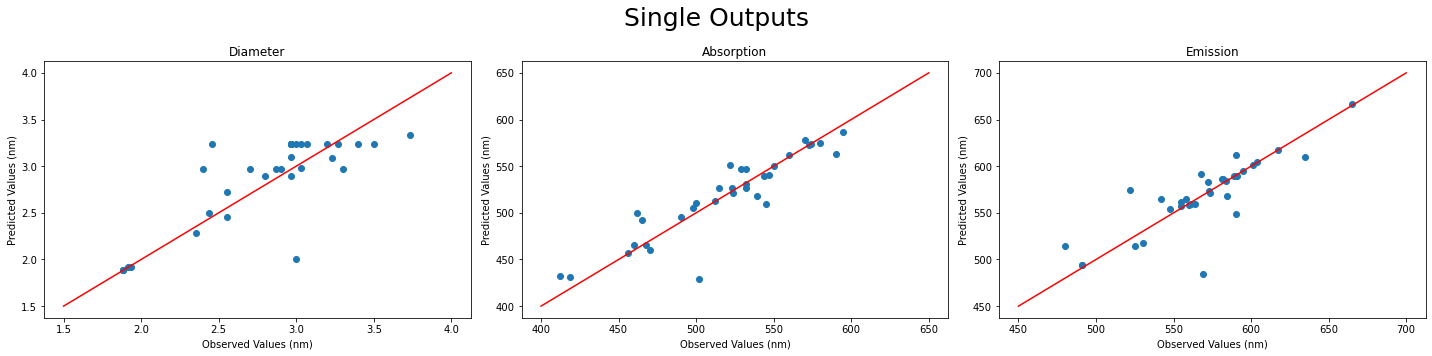

In [31]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))
fig.suptitle('Single Outputs', fontsize=25)

ax1.plot(Y_test_d, DT_Y_pred_d,'o')
ax1.plot([1.5,4],[1.5,4], color = 'r')
ax1.set_title('Diameter')
ax1.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')

ax2.plot(Y_test_a, ET_Y_pred_a,'o')
ax2.plot([400,650],[400,650], color = 'r')
ax2.set_title('Absorption')
ax2.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')

ax3.plot(Y_test_e, ET_Y_pred_e,'o')
ax3.plot([450,700],[450,700], color = 'r')
ax3.set_title('Emission')
ax3.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')


fig.tight_layout()

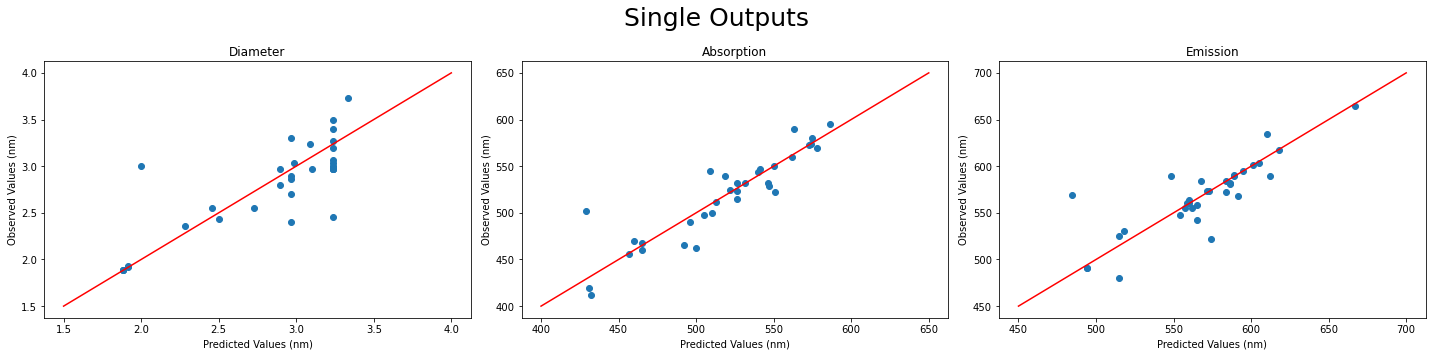

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))
fig.suptitle('Single Outputs', fontsize=25)

ax1.plot(DT_Y_pred_d, Y_test_d, 'o')
ax1.plot([1.5,4],[1.5,4], color = 'r')
ax1.set_title('Diameter')
ax1.set(ylabel='Observed Values (nm)', xlabel='Predicted Values (nm)')

ax2.plot(ET_Y_pred_a, Y_test_a, 'o')
ax2.plot([400,650],[400,650], color = 'r')
ax2.set_title('Absorption')
ax2.set(ylabel='Observed Values (nm)', xlabel='Predicted Values (nm)')

ax3.plot(ET_Y_pred_e, Y_test_e, 'o')
ax3.plot([450,700],[450,700], color = 'r')
ax3.set_title('Emission')
ax3.set(ylabel='Observed Values (nm)', xlabel='Predicted Values (nm)')


fig.tight_layout()

## Feature importance

### For diameter prediction

In [32]:
importance_dict_d = dict()
for i in range(0,71):
    importance_dict_d[input_col[i]] = DT_regr_d.feature_importances_[i]

sorted_importance_d = sorted(importance_dict_d.items(), key=lambda x: x[1], reverse=True)

sorted_importance_d


[('x6_zinc iodide', 0.2637955854061895),
 ('x0_indium trifluoroacetate', 0.24879095762042372),
 ('temp_c', 0.0925731795075623),
 ('time_min', 0.07402261562678016),
 ('x4_dioctylamine', 0.061033276985888105),
 ('p_amount_mmol', 0.04297990243726769),
 ('total_volume_ml', 0.03540823738599123),
 ('other_2_amount_mmol', 0.0322195984362151),
 ('x1_phosphine gas', 0.02778265410336227),
 ('first_sol_amount_ml', 0.01916807617818745),
 ('second_sol_amount_ml', 0.019062196623655787),
 ('ligand_amount_mmol', 0.016551794593083206),
 ('x6_zinc undecylenate', 0.011502525482079083),
 ('x3_trioctylamine', 0.009719327633635137),
 ('x6_zinc oleate', 0.00927406535392528),
 ('other_1_amount_mmol', 0.007934070779385438),
 ('x0_indium acetate', 0.007450813349345709),
 ('x2_myristic acid', 0.007182268762551215),
 ('in_amount_mmol', 0.003928927613153915),
 ('x6_zinc chloride', 0.003292278617164486),
 ('third_sol_amount_ml', 0.0014960452937727985),
 ('x2_lauric acid', 0.001445761792642438),
 ('x4_oleylamine', 0

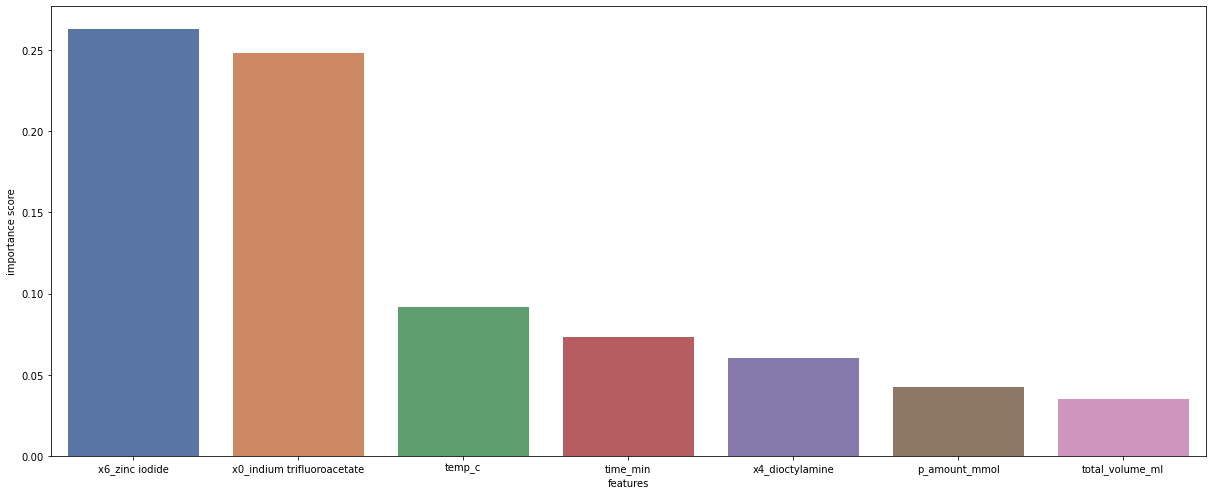

In [33]:
top7_d = DataFrame(sorted_importance_d[0:7], columns=['features', 'importance score'])

others_d = DataFrame(sorted_importance_d[7:], columns=['features', 'importance score'])


import seaborn as sns

a4_dims = (20.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set_theme(style="whitegrid")

ax = sns.barplot(x="features", y="importance score", data=top7_d)

### Emission prediction

In [34]:
importance_dict_e = dict()
for i in range(0,71):
    importance_dict_e[input_col[i]] = ET_regr_e.feature_importances_[i]

sorted_importance_e = sorted(importance_dict_e.items(), key=lambda x: x[1], reverse=True)


sorted_importance_e


[('temp_c', 0.15224150036523332),
 ('p_amount_mmol', 0.1010508972017222),
 ('time_min', 0.09600925907505653),
 ('x6_zinc iodide', 0.09330680840252677),
 ('x1_phosphine gas', 0.07396199260532291),
 ('x3_octadecene', 0.05884699140412092),
 ('x6_None', 0.05276032860643107),
 ('in_amount_mmol', 0.029130815219509394),
 ('ligand_amount_mmol', 0.028709147051635645),
 ('total_volume_ml', 0.025584420529655746),
 ('first_sol_amount_ml', 0.024754850522262718),
 ('x6_zinc undecylenate', 0.021307343313891624),
 ('x6_zinc bromide', 0.021261587553433058),
 ('x4_trioctylphosphine', 0.018159033426499778),
 ('x0_indium iodide', 0.017031916246615),
 ('second_sol_amount_ml', 0.016669326197567436),
 ('x2_dodecanethiol', 0.01567836070092423),
 ('other_1_amount_mmol', 0.014372313137504084),
 ('x0_chloroindium oxalate', 0.014186122576935611),
 ('x7_None', 0.012793433621611916),
 ('x2_lauric acid', 0.01043456425150365),
 ('x2_stearic acid', 0.009093575636584111),
 ('x4_None', 0.008894661476439615),
 ('x4_octyl

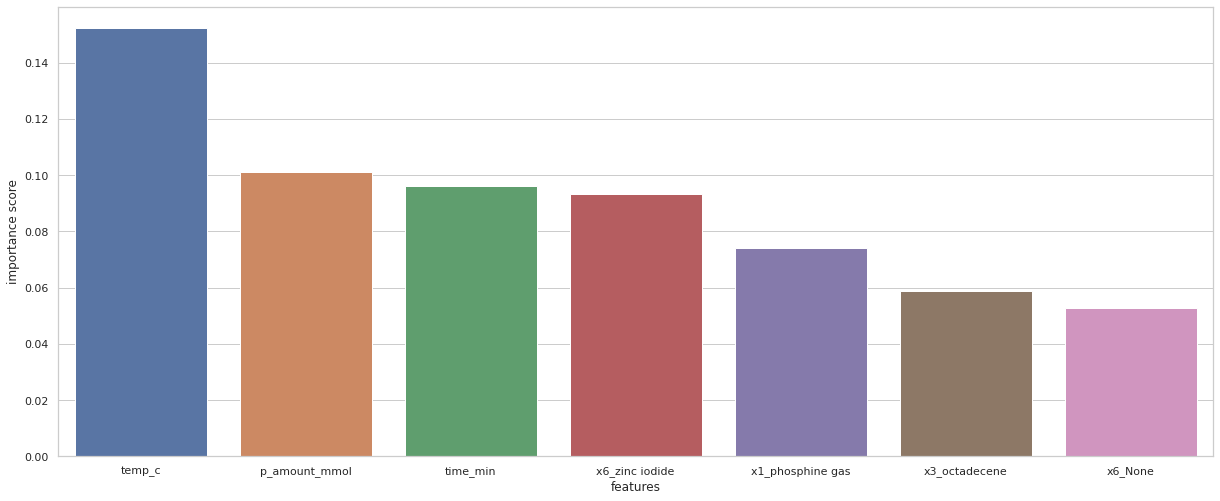

In [35]:
top7_e = DataFrame(sorted_importance_e[0:7], columns=['features', 'importance score'])

others_e = DataFrame(sorted_importance_e[7:], columns=['features', 'importance score'])

# combined_others2 = pd.DataFrame(data = {
#     'features' : ['others'],
#     'importance score' : [others2['importance score'].sum()]
# })

# #combining top 10 with others
# imp_score2 = pd.concat([top7, combined_others2])

import seaborn as sns

a4_dims = (20.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set_theme(style="whitegrid")

ax = sns.barplot(x="features", y="importance score", data=top7_e)

### Absorption prediction

In [36]:
importance_dict_a = dict()
for i in range(0,71):
    importance_dict_a[input_col[i]] = ET_regr_a.feature_importances_[i]

sorted_importance_a = sorted(importance_dict_a.items(), key=lambda x: x[1], reverse=True)

sorted_importance_a

[('temp_c', 0.17334458480235657),
 ('time_min', 0.12250850558150722),
 ('x6_None', 0.08346494094704109),
 ('x4_octylamine', 0.0523072593902916),
 ('x1_phosphine gas', 0.03476024307454617),
 ('ligand_amount_mmol', 0.03445213294975361),
 ('p_amount_mmol', 0.03371096798897218),
 ('x4_trioctylphosphine oxide', 0.031635434738853524),
 ('x6_zinc iodide', 0.03061130191933884),
 ('x6_zinc chloride', 0.03060489925489744),
 ('x7_None', 0.02764207288318158),
 ('first_sol_amount_ml', 0.02519503024624197),
 ('total_volume_ml', 0.022855599180598367),
 ('in_amount_mmol', 0.020866598541366604),
 ('x2_stearic acid', 0.02069517698101926),
 ('x6_zinc oleate', 0.018216663421703496),
 ('other_1_amount_mmol', 0.01655013187329893),
 ('x1_tris(trimethylsilyl)phosphine', 0.016022454995468564),
 ('x2_myristic acid', 0.015614368174385575),
 ('x4_None', 0.013847792042404276),
 ('x4_trioctylphosphine', 0.013843340664650561),
 ('second_sol_amount_ml', 0.013750716433295777),
 ('x4_dioctylamine', 0.01076833678304787)

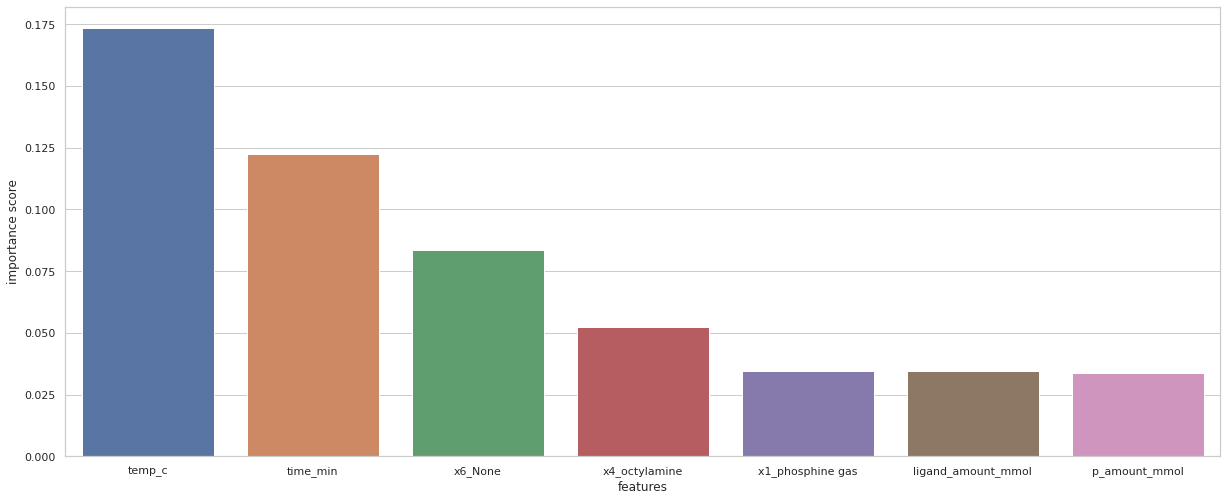

In [37]:
top7_a = DataFrame(sorted_importance_a[0:7], columns=['features', 'importance score'])

others_a = DataFrame(sorted_importance_a[7:], columns=['features', 'importance score'])

import seaborn as sns

a4_dims = (20.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set_theme(style="whitegrid")

ax = sns.barplot(x="features", y="importance score", data=top7_a)

In [49]:
importance_dict_a

{'in_amount_mmol': 0.008174599777625944,
 'p_amount_mmol': 0.02098466258492522,
 'sol_amount_ml': 0.0041175291495416004,
 'TOP_amount_mmol': 0.07109420883009378,
 'acid_amount_mmol': 0.02603300508947207,
 'amine_amount_mmol': 0.0858852953673919,
 'thiol_amount_mmol': 0.0,
 'zinc_amount_mmol': 0.001882284230793519,
 'other_amount_mmol': 0.013926791047683594,
 'total_volume_ml': 0.07233345402138885,
 'temp_c': 0.2197705845090209,
 'time_min': 0.14861232814590902,
 'x0_chloroindium oxalate': 0.0010142211310188397,
 'x0_indium acetate': 3.975746833593852e-05,
 'x0_indium bromide': 6.744946138633628e-05,
 'x0_indium chloride': 0.011207738505694315,
 'x0_indium iodide': 0.0044419972903610395,
 'x0_indium myristate': 3.2455076192602868e-06,
 'x0_indium oxalate': 0.0,
 'x0_indium palmitate': 0.0,
 'x0_indium trifluoroacetate': 0.0,
 'x0_indium tris(N,N-diisopropylacetamidinato)': 0.0,
 'x1_bis(trimethylsilyl)phosphine': 0.0,
 'x1_phosphine gas': 0.05891206796682794,
 'x1_phosphorus trichloride

### Combine


In [38]:
sorted_a = sorted(importance_dict_a.items(), key=lambda x: x[0], reverse=False)
sorted_d = sorted(importance_dict_d.items(), key=lambda x: x[0], reverse=False)
sorted_e = sorted(importance_dict_e.items(), key=lambda x: x[0], reverse=False)


In [39]:
sorted_d 

[('first_sol_amount_ml', 0.01916807617818745),
 ('in_amount_mmol', 0.003928927613153915),
 ('ligand_amount_mmol', 0.016551794593083206),
 ('other_1_amount_mmol', 0.007934070779385438),
 ('other_2_amount_mmol', 0.0322195984362151),
 ('p_amount_mmol', 0.04297990243726769),
 ('second_sol_amount_ml', 0.019062196623655787),
 ('temp_c', 0.0925731795075623),
 ('third_sol_amount_ml', 0.0014960452937727985),
 ('time_min', 0.07402261562678016),
 ('total_volume_ml', 0.03540823738599123),
 ('x0_chloroindium oxalate', 0.0),
 ('x0_indium acetate', 0.007450813349345709),
 ('x0_indium bromide', 0.0),
 ('x0_indium chloride', 2.669920160250676e-06),
 ('x0_indium iodide', 0.0),
 ('x0_indium myristate', 0.0),
 ('x0_indium oxalate', 0.0),
 ('x0_indium palmitate', 0.0),
 ('x0_indium trifluoroacetate', 0.24879095762042372),
 ('x0_indium tris(N,N-diisopropylacetamidinato)', 0.0),
 ('x1_bis(trimethylsilyl)phosphine', 0.0),
 ('x1_phosphine gas', 0.02778265410336227),
 ('x1_phosphorus trichloride', 0.0),
 ('x1_s

In [40]:
combined_importance = dict()

In [41]:
for i in range(0,71):
    combined_importance[sorted_e[i][0]] = sorted_e[i][1] + sorted_a[i][1] + sorted_d[i][1]
combined_importance


{'first_sol_amount_ml': 0.06911795694669215,
 'in_amount_mmol': 0.053926341374029914,
 'ligand_amount_mmol': 0.07971307459447247,
 'other_1_amount_mmol': 0.03885651579018845,
 'other_2_amount_mmol': 0.03679663298716245,
 'p_amount_mmol': 0.17774176762796207,
 'second_sol_amount_ml': 0.049482239254519,
 'temp_c': 0.4181592646751522,
 'third_sol_amount_ml': 0.0016694278745534217,
 'time_min': 0.2925403802833439,
 'total_volume_ml': 0.08384825709624534,
 'x0_chloroindium oxalate': 0.022198150823803123,
 'x0_indium acetate': 0.009003749979926454,
 'x0_indium bromide': 0.0024955354558034003,
 'x0_indium chloride': 0.011137064636557894,
 'x0_indium iodide': 0.02646845643860149,
 'x0_indium myristate': 0.007542000062051579,
 'x0_indium oxalate': 0.006155090305963609,
 'x0_indium palmitate': 0.0007227115796125663,
 'x0_indium trifluoroacetate': 0.2492226178828821,
 'x0_indium tris(N,N-diisopropylacetamidinato)': 0.001602098176569583,
 'x1_bis(trimethylsilyl)phosphine': 0.0005321249766378792,
 

In [42]:
sorted_combined_importance = sorted(combined_importance.items(), key=lambda x: x[1], reverse=True)

sorted_combined_importance 

[('temp_c', 0.4181592646751522),
 ('x6_zinc iodide', 0.38771369572805514),
 ('time_min', 0.2925403802833439),
 ('x0_indium trifluoroacetate', 0.2492226178828821),
 ('p_amount_mmol', 0.17774176762796207),
 ('x1_phosphine gas', 0.13650488978323136),
 ('x6_None', 0.13622526955347214),
 ('total_volume_ml', 0.08384825709624534),
 ('ligand_amount_mmol', 0.07971307459447247),
 ('x4_dioctylamine', 0.07180161376893597),
 ('first_sol_amount_ml', 0.06911795694669215),
 ('x3_octadecene', 0.06673775396094875),
 ('x4_octylamine', 0.05951354369272392),
 ('in_amount_mmol', 0.053926341374029914),
 ('second_sol_amount_ml', 0.049482239254519),
 ('x7_None', 0.040435506504793495),
 ('other_1_amount_mmol', 0.03885651579018845),
 ('x6_zinc undecylenate', 0.03698159164298885),
 ('other_2_amount_mmol', 0.03679663298716245),
 ('x6_zinc chloride', 0.03593336849110082),
 ('x4_trioctylphosphine oxide', 0.032168261436309686),
 ('x4_trioctylphosphine', 0.03200237409115034),
 ('x2_stearic acid', 0.029788752617603373)

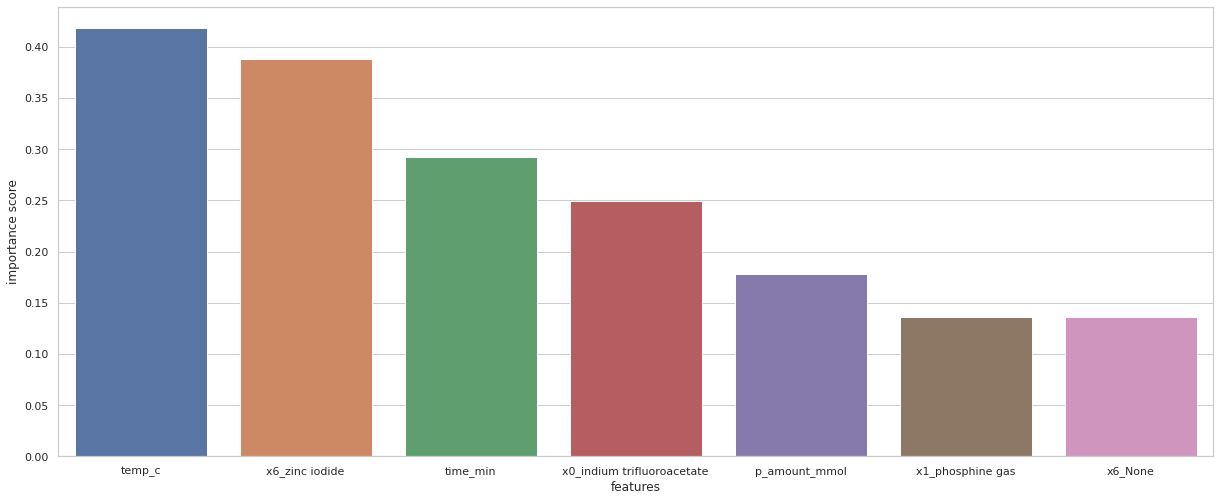

In [43]:
top7_combined = DataFrame(sorted_combined_importance[0:7], columns=['features', 'importance score'])

others_combined = DataFrame(sorted_combined_importance [7:], columns=['features', 'importance score'])

import seaborn as sns

a4_dims = (20.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set_theme(style="whitegrid")

ax = sns.barplot(x="features", y="importance score", data=top7_combined)